## Frontmatter

**Units**

- baseflow - mm/water year
- precip - mm/water year
- runoff - mm/water year
- snowmelt - m/day
- wflux - m/day

In [1]:
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_pickle('./data/HW_wrf_data.df')

In [13]:
tmp = np.load('./data/HW_index_cells_by_basin.npz')
cells = tmp['cells']
watersheds = tmp['watersheds']
percents = tmp['percents']

In [14]:
# for each watershed, compute mean arial precipitation, runoff, and baseflow plus some others

def extract_watershed(watershed,cells,percents):
    tmp = pd.DataFrame({'idx':cells,'percent':percents}) # cell index numbers and their proportion in the basin
    tmp = pd.merge(left=tmp,right=df,how='inner',on='idx') # generate a data frame of percents, index cells, water years and data
    
    # compute the weights for the variables
    tmp['weight'] = 1./len(tmp)
    tmp['weight'] *= tmp['percent']
    
    for var in ['baseflow','precip','runoff','snowmelt','wflux']:
        
        tmp[var] *= tmp['weight'] # scale the cell values by the percent the cell is in the watershed
    
    tmp1 = tmp.groupby(by='wyear').sum() # compute Mean area values for each water year for each variable
    
    tmp1['huc8'] = watershed # add the watershed identifier to the data frame
    del tmp['idx']
    
    return tmp1,tmp

In [5]:
out = pd.DataFrame()
for w,c,p in zip(watersheds,cells,percents):
    tmp1,tmp = extract_watershed(w,c,p)
    out = out.append(tmp1)

out['Q_P'] = (out['baseflow']+out['runoff'])/out['precip']

In [6]:
out

,idx,percent,baseflow,precip,runoff,snowmelt,wflux,weight,huc8,Q_P
wyear,,,,,,,,,,
2001,14888123,229.30,4.837174,58.911923,4.286212,0.001865,0.001945,0.107754,10180001,0.154865
2002,14888123,229.30,4.179492,48.075205,2.094156,0.001421,0.001472,0.107754,10180001,0.130497
2003,14888123,229.30,7.342675,57.135333,3.240097,0.002061,0.002140,0.107754,10180001,0.185223
2004,14888123,229.30,5.401238,54.738904,1.040001,0.001803,0.001872,0.107754,10180001,0.117672
2005,14888123,229.30,11.011451,59.148980,4.497560,0.002234,0.002310,0.107754,10180001,0.262203
2006,14888123,229.30,10.044636,65.729006,2.024428,0.002302,0.002364,0.107754,10180001,0.183619
2007,14888123,229.30,7.948254,61.913112,2.930968,0.002015,0.002090,0.107754,10180001,0.175718
2008,14888123,229.30,9.512614,60.563741,3.967288,0.002402,0.002466,0.107754,10180001,0.222574
2001,26855444,362.18,1.634288,47.879511,2.506868,0.001207,0.001282,0.104315,10180010,0.086491


In [59]:
out.to_pickle('./data/wrf_hw_ctrl_diversion_sm_rr.pcl')

In [22]:
## load the diversions
data = pd.read_excel('/Volumes/shareProjects/WSC/data/DWR_data/diversions/Transbasin_Structures_detailed_TBB.xlsx')

In [23]:
div = []
for cont,rec in zip(data.HUC8From.as_matrix(),data.Huc8To.as_matrix()):
    div.append('%s:%s'%(cont,rec))

In [24]:
div = np.unique(div)

In [27]:
huc8from = []
huc8to = []
namefrom = []
nameto = []
divname = []
for d in div:
    tmp = d.split(':')
    huc8from.append(int(tmp[0]))
    huc8to.append(int(tmp[1]))
    tn = data.loc[(data.HUC8From == int(tmp[0])) & (data.Huc8To == int(tmp[1]))].HUC8ToName.as_matrix()
    fn = data.loc[(data.HUC8From == int(tmp[0])) & (data.Huc8To == int(tmp[1]))].HUC8FromName.as_matrix()
    namefrom.append(str(fn[0]))
    nameto.append(str(tn[0]))
    divname.append(str(fn[0])+' : '+str(tn[0]))

In [28]:
dat = pd.DataFrame({'diversion':div,'huc8from':huc8from,'huc8to':huc8to,'fromname':namefrom,'toname':nameto,'diversionname':divname})

In [29]:
for i in dat.index:
    # pull out the contributing and recieving basins for each diversion
    ht = dat.loc[i].huc8to
    hf = dat.loc[i].huc8from
    
    mod1 = smf.ols('Q_P ~ wflux + 1',out.loc[out.huc8==ht]).fit() # Receiving basin
    mod2 = smf.ols('Q_P ~ wflux + 1',out.loc[out.huc8==hf]).fit() # contributing basin
    
    dat.loc[i,'from_slope'] = mod2.params['wflux']
    dat.loc[i,'from_int'] = mod2.params['Intercept']
    dat.loc[i,'from_r2'] = mod2.rsquared
    dat.loc[i,'from_pval'] = mod2.f_pvalue
    
    dat.loc[i,'to_slope'] = mod1.params['wflux']
    dat.loc[i,'to_int'] = mod1.params['Intercept']
    dat.loc[i,'to_r2'] = mod1.rsquared
    dat.loc[i,'to_pval'] = mod1.f_pvalue
    
    dat.loc[i,'ratio'] = mod2.params['wflux'] / mod1.params['wflux']

In [54]:
mod2.conf_int()

,0,1
Intercept,-0.052117,0.251396
wflux,-68.353756,139.908201


In [ ]:
mod2.

In [51]:
dat.to_excel('./figures/HW_CTRL_transbasin_diversions.xlsx')

In [52]:
dat

,diversion,diversionname,fromname,huc8from,huc8to,toname,from_slope,from_int,from_r2,from_pval,to_slope,to_int,to_r2,to_pval,ratio
0,10180001:10190007,North Platte Headwaters : Cache La Poudre,North Platte Headwaters,10180001,10190007,Cache La Poudre,115.731713,-0.061937,0.616852,0.020902,38.961065,0.067422,0.176733,0.299705,2.970445
1,10180010:10190007,Upper Laramie : Cache La Poudre,Upper Laramie,10180010,10190007,Cache La Poudre,35.536532,0.028498,0.325187,0.139963,38.961065,0.067422,0.176733,0.299705,0.912104
2,14010001:10190004,Colorado Headwaters : Clear,Colorado Headwaters,14010001,10190004,Clear,72.772103,0.054680,0.326530,0.138961,78.869076,0.168340,0.760752,0.004730,0.922695
3,14010001:10190005,Colorado Headwaters : St. Vrain,Colorado Headwaters,14010001,10190005,St. Vrain,72.772103,0.054680,0.326530,0.138961,106.178009,0.061256,0.764068,0.004529,0.685378
4,14010001:10190006,Colorado Headwaters : Big Thompson,Colorado Headwaters,14010001,10190006,Big Thompson,72.772103,0.054680,0.326530,0.138961,47.539381,0.076561,0.168599,0.312268,1.530775
5,14010001:10190007,Colorado Headwaters : Cache La Poudre,Colorado Headwaters,14010001,10190007,Cache La Poudre,72.772103,0.054680,0.326530,0.138961,38.961065,0.067422,0.176733,0.299705,1.867816
6,14010002:10190001,Blue : South Platte Headwaters,Blue,14010002,10190001,South Platte Headwaters,36.954681,0.224956,0.060281,0.557813,73.464943,0.061712,0.250747,0.206245,0.503025
7,14010002:10190002,Blue : Upper South Platte,Blue,14010002,10190002,Upper South Platte,36.954681,0.224956,0.060281,0.557813,30.134244,0.094313,0.590867,0.025824,1.226335
8,14010002:10190004,Blue : Clear,Blue,14010002,10190004,Clear,36.954681,0.224956,0.060281,0.557813,78.869076,0.168340,0.760752,0.004730,0.468557
9,14010003:11020001,Eagle : Arkansas Headwaters,Eagle,14010003,11020001,Arkansas Headwaters,117.178206,-0.040116,0.863924,0.000831,56.216636,0.122450,0.291757,0.166974,2.084404


In [31]:
out['wateryear'] = out.index

In [33]:
test = out.groupby(by=['huc8','wateryear']).sum()
del test['idx']
del test['percent']
del test['wflux']
del test['weight']
del test['snowmelt']

test.reset_index(inplace=True)

In [34]:
test = test.groupby(by='huc8').mean()
del test['wateryear']

In [35]:
huc8s = []
names = []

for i in data.index:
    huc8s.append(data.loc[i].Huc8To)
    names.append(str(data.loc[i].HUC8ToName))
    huc8s.append(data.loc[i].HUC8From)
    names.append(str(data.loc[i].HUC8FromName))

In [36]:
huc8s = pd.DataFrame({'huc8':huc8s,'watershed':names})

In [37]:
test.dtypes

baseflow    float64
precip      float64
runoff      float64
Q_P         float64
dtype: object

In [38]:
test['basin'] = np.NaN
for i in test.index:
    test.loc[i,'basin'] = huc8s.loc[huc8s.huc8==i].watershed.as_matrix()[0]
    
test.reset_index(inplace=True)
test.index = test.basin

del test['basin']

bf = test.baseflow.as_matrix()
ro = test.runoff.as_matrix()

test['Q'] = bf+ro

In [39]:
test

,huc8,baseflow,precip,runoff,Q_P,Q
basin,,,,,,
North Platte Headwaters,10180001,7.534692,58.277025,3.010089,0.179046,10.544780
Upper Laramie,10180010,1.688478,46.488575,1.507758,0.067971,3.196235
South Platte Headwaters,10190001,1.361137,47.056051,4.732086,0.127555,6.093222
Upper South Platte,10190002,3.441330,50.493778,2.889405,0.123805,6.330736
Clear,10190004,5.659546,55.305611,9.679842,0.274231,15.339388
St. Vrain,10190005,6.408261,51.975270,3.102554,0.179987,9.510815
Big Thompson,10190006,4.036473,48.435314,1.932900,0.122031,5.969373
Cache La Poudre,10190007,2.914179,46.165461,1.845147,0.102214,4.759326
Arkansas Headwaters,11020001,2.723505,51.715940,7.359742,0.193007,10.083247


In [40]:
# create a data frame with diversions

out2 = pd.DataFrame()
for i in dat.index:
    diversion = dat.loc[i].diversionname
    h8f = dat.loc[i].huc8from
    h8t = dat.loc[i].huc8to
    
    tmp = out.loc[out.huc8==h8f].copy()
    tmp['diversionname'] = diversion
    tmp['type'] = 'contributing'
    out2 = out2.append(tmp)
    
    tmp = out.loc[out.huc8==h8t].copy()
    tmp['diversionname'] = diversion
    tmp['type'] = 'receiving'
    out2 = out2.append(tmp)

In [42]:
out2.wflux *= 1000. # m/day > mm/day

In [49]:
out2

,idx,percent,baseflow,precip,runoff,snowmelt,wflux,weight,huc8,Q_P,wateryear,diversionname,type
wyear,,,,,,,,,,,,,
2001,14888123,229.30,4.837174,58.911923,4.286212,0.001865,1.944790,0.107754,10180001,0.154865,2001,North Platte Headwaters : Cache La Poudre,contributing
2002,14888123,229.30,4.179492,48.075205,2.094156,0.001421,1.471539,0.107754,10180001,0.130497,2002,North Platte Headwaters : Cache La Poudre,contributing
2003,14888123,229.30,7.342675,57.135333,3.240097,0.002061,2.139771,0.107754,10180001,0.185223,2003,North Platte Headwaters : Cache La Poudre,contributing
2004,14888123,229.30,5.401238,54.738904,1.040001,0.001803,1.872362,0.107754,10180001,0.117672,2004,North Platte Headwaters : Cache La Poudre,contributing
2005,14888123,229.30,11.011451,59.148980,4.497560,0.002234,2.309523,0.107754,10180001,0.262203,2005,North Platte Headwaters : Cache La Poudre,contributing
2006,14888123,229.30,10.044636,65.729006,2.024428,0.002302,2.364404,0.107754,10180001,0.183619,2006,North Platte Headwaters : Cache La Poudre,contributing
2007,14888123,229.30,7.948254,61.913112,2.930968,0.002015,2.089503,0.107754,10180001,0.175718,2007,North Platte Headwaters : Cache La Poudre,contributing
2008,14888123,229.30,9.512614,60.563741,3.967288,0.002402,2.466150,0.107754,10180001,0.222574,2008,North Platte Headwaters : Cache La Poudre,contributing
2001,20400676,303.89,1.660781,49.110736,2.087745,0.000928,1.000315,0.106107,10190007,0.076328,2001,North Platte Headwaters : Cache La Poudre,receiving


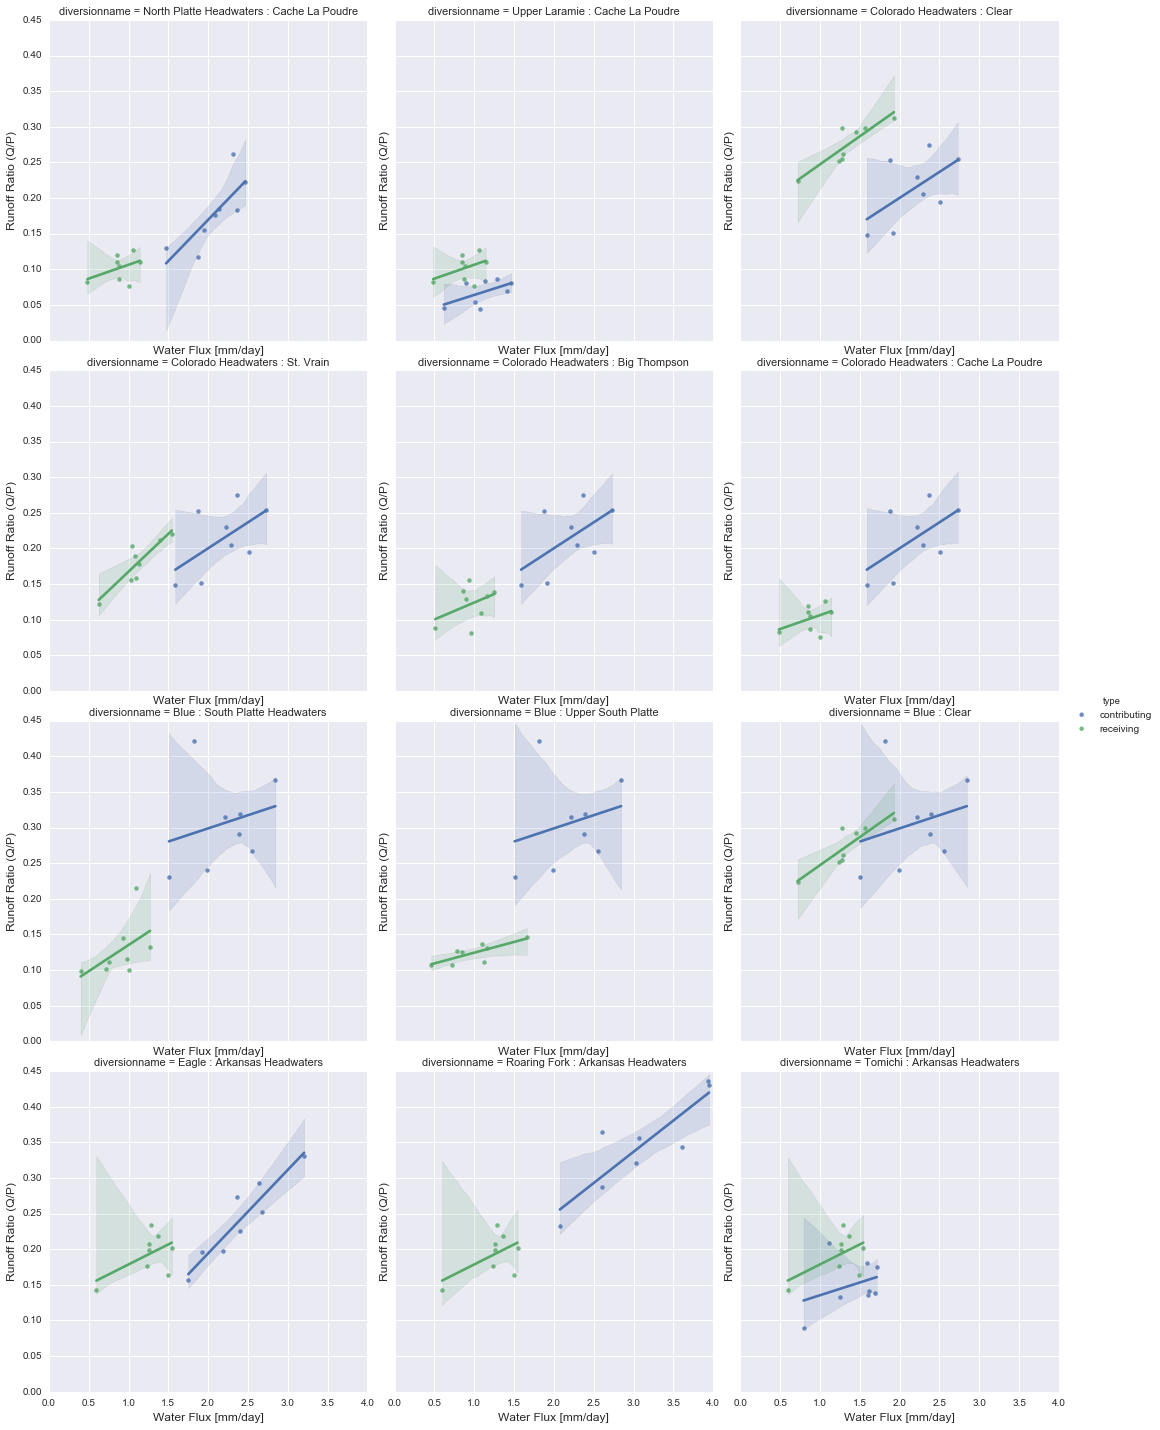

In [50]:
p = sns.lmplot('wflux','Q_P',out2, hue='type', col='diversionname',col_wrap=3,size=5, truncate=True)

for ax in p.axes.flat:
    ax.set_ylim(0,0.45)
    ax.set_xlim(0,4.0)
    ax.axhline(1,c='k')
    ax.set_xlabel('Water Flux [mm/day]', fontsize=12)
    ax.set_ylabel('Runoff Ratio (Q/P)', fontsize=12)
    
plt.savefig('./figures/transbasin_sensitivity_wrf.pdf',bbox_inches='tight')

In [55]:
whos

Variable            Type                        Data/Info
---------------------------------------------------------
ax                  AxesSubplot                 Axes(0.641836,0.0298333;0.272753x0.222704)
bf                  ndarray                     14: 14 elems, type `float64`, 112 bytes
c                   ndarray                     215: 215 elems, type `float64`, 1720 bytes
cell                ndarray                     266: 266 elems, type `float64`, 2128 bytes
cells               ndarray                     14: 14 elems, type `object`, 112 bytes
cont                int64                       14020003
d                   string_                     14020003:11020001
dat                 DataFrame                               diversion    <...>n11  0.166974  0.636417  
data                DataFrame                        Priority    From Bas<...>as Headwaters  11020001  
df                  DataFrame                              baseflow    id<...>[666968 rows x 7 columns]
d

In [56]:
div

array(['10180001:10190007', '10180010:10190007', '14010001:10190004',
       '14010001:10190005', '14010001:10190006', '14010001:10190007',
       '14010002:10190001', '14010002:10190002', '14010002:10190004',
       '14010003:11020001', '14010004:11020001', '14020003:11020001'], 
      dtype='|S17')

In [58]:
dat

,diversion,diversionname,fromname,huc8from,huc8to,toname,from_slope,from_int,from_r2,from_pval,to_slope,to_int,to_r2,to_pval,ratio
0,10180001:10190007,North Platte Headwaters : Cache La Poudre,North Platte Headwaters,10180001,10190007,Cache La Poudre,115.731713,-0.061937,0.616852,0.020902,38.961065,0.067422,0.176733,0.299705,2.970445
1,10180010:10190007,Upper Laramie : Cache La Poudre,Upper Laramie,10180010,10190007,Cache La Poudre,35.536532,0.028498,0.325187,0.139963,38.961065,0.067422,0.176733,0.299705,0.912104
2,14010001:10190004,Colorado Headwaters : Clear,Colorado Headwaters,14010001,10190004,Clear,72.772103,0.054680,0.326530,0.138961,78.869076,0.168340,0.760752,0.004730,0.922695
3,14010001:10190005,Colorado Headwaters : St. Vrain,Colorado Headwaters,14010001,10190005,St. Vrain,72.772103,0.054680,0.326530,0.138961,106.178009,0.061256,0.764068,0.004529,0.685378
4,14010001:10190006,Colorado Headwaters : Big Thompson,Colorado Headwaters,14010001,10190006,Big Thompson,72.772103,0.054680,0.326530,0.138961,47.539381,0.076561,0.168599,0.312268,1.530775
5,14010001:10190007,Colorado Headwaters : Cache La Poudre,Colorado Headwaters,14010001,10190007,Cache La Poudre,72.772103,0.054680,0.326530,0.138961,38.961065,0.067422,0.176733,0.299705,1.867816
6,14010002:10190001,Blue : South Platte Headwaters,Blue,14010002,10190001,South Platte Headwaters,36.954681,0.224956,0.060281,0.557813,73.464943,0.061712,0.250747,0.206245,0.503025
7,14010002:10190002,Blue : Upper South Platte,Blue,14010002,10190002,Upper South Platte,36.954681,0.224956,0.060281,0.557813,30.134244,0.094313,0.590867,0.025824,1.226335
8,14010002:10190004,Blue : Clear,Blue,14010002,10190004,Clear,36.954681,0.224956,0.060281,0.557813,78.869076,0.168340,0.760752,0.004730,0.468557
9,14010003:11020001,Eagle : Arkansas Headwaters,Eagle,14010003,11020001,Arkansas Headwaters,117.178206,-0.040116,0.863924,0.000831,56.216636,0.122450,0.291757,0.166974,2.084404


In [ ]:
def plotslopes(xvar,yvar,title,xlab,printfig,figpath):
    Frommods = []
    Tomods = []

    Anovas = []

    tabcols = ['From_RR_Slope','To_RR_Slope','Ratio','Slopes_Pval','From_Pval','To_Pval', 'From_r2','To_r2']

    tab = pd.DataFrame(columns=tabcols,index=divpairs)
    
    for frm,to,div in zip(huc8from,huc8to,divpairs):
    
        X = (data.loc[data.huc82==frm,xx]-data.loc[data.huc82==frm,xx].mean()).as_matrix()
        y = (data.loc[data.huc82==frm,yy]-data.loc[data.huc82==frm,yy].mean()).as_matrix()
        X = sm.add_constant(X)
        mod1 = sm.OLS(y,X).fit()
        Frommods.append(mod1)

        X = (data.loc[data.huc82==to,xx]-data.loc[data.huc82==to,xx].mean()).as_matrix()
        y = (data.loc[data.huc82==to,yy]-data.loc[data.huc82==to,yy].mean()).as_matrix()
        X = sm.add_constant(X)
        mod2 = sm.OLS(y,X).fit()
        Tomods.append(mod2)

        an = sm.stats.anova_lm(mod2,mod1)

        Anovas.append(an)

        tab.loc[div,'From_RR_Slope'] = round(mod1.params[1],3)
        tab.loc[div,'To_RR_Slope'] = round(mod2.params[1],3)
        tab.loc[div,'Ratio'] = round(mod1.params[1]/mod2.params[1],3)
        tab.loc[div,'From_Pval'] = mod1.f_pvalue
        tab.loc[div,'To_Pval'] = mod2.f_pvalue
        tab.loc[div,'From_r2'] = round(mod1.rsquared,2)
        tab.loc[div,'To_r2'] = round(mod2.rsquared,2)
        tab.loc[div,'Slopes_Pval'] = round(testslopes(mod1,mod2),3)
    
    mod_cis = pd.DataFrame(columns=['to_upper','to_lower','to_slp','from_upper',
                                'from_lower','from_slp','to_r2','from_r2','to_p','from_p'], index=divpairs)
    
    mod_cis = pd.DataFrame(columns=['to_upper','to_lower','to_slp','from_upper',
                                'from_lower','from_slp','to_r2','from_r2','to_p','from_p'], index=divpairs)

    for tomod,frmod,div in zip(Tomods,Frommods,divpairs):
        tosum = tomod.summary()
        frsum = frmod.summary()

        tosum = tosum.tables[1]
        frsum = frsum.tables[1]

        toci = tosum.data[-1][-1]
        frci = frsum.data[-1][-1]

        to_ul = []
        for st in toci.split(' '):
            if st == '':
                continue
            else:
                to_ul.append(float(st))

        fr_ul = []
        for st in frci.split(' '):
            if st == '':
                continue
            else:
                fr_ul.append(float(st))

        mod_cis.loc[div,'to_upper'] = to_ul[-1]
        mod_cis.loc[div,'to_lower'] = to_ul[0]
        mod_cis.loc[div,'to_slp'] = tomod.params[-1]

        mod_cis.loc[div,'from_upper'] = fr_ul[-1]
        mod_cis.loc[div,'from_lower'] = fr_ul[0]
        mod_cis.loc[div,'from_slp'] = frmod.params[-1]
        mod_cis.loc[div,'to_r2'] = tomod.rsquared
        mod_cis.loc[div,'from_r2'] = frmod.rsquared
        mod_cis.loc[div,'to_p'] = tomod.f_pvalue
        mod_cis.loc[div,'from_p'] = frmod.f_pvalue 

    plt.figure(figsize=(6.5,9))
    ct = 2.1
    for c,u,l,p,r in zip(mod_cis.to_slp,mod_cis.to_upper,mod_cis.to_lower,mod_cis.to_p,mod_cis.to_r2):
        p1 = plt.scatter(c,ct,s=60,c=current_palette[1],marker='s')
        plt.hlines(ct,l,u,colors=current_palette[1],lw=2)
        #plt.scatter(p,ct,s=60,marker='*',c=current_palette[1])
        #plt.plot(r,ct,'ob')
        ct += 2


    ct = 1.9
    for c,u,l,p,r in zip(mod_cis.from_slp,mod_cis.from_upper,mod_cis.from_lower,mod_cis.from_p,mod_cis.from_r2):
        p2 = plt.scatter(c,ct,s=60,c=current_palette[0],marker='s')
        plt.hlines(ct,l,u,colors=current_palette[0],lw=2)
        #plt.scatter(p,ct,s=60,marker='*',c=current_palette[0])
        #plt.plot(r,ct,'or')
        ct += 2

    plt.ylim(0,26)

    plt.xlabel(xlab, fontsize=22);
    plt.xticks(fontsize=18);
    p = plt.gca();
    p.set_yticks(np.arange(2,26,2));
    p.set_yticklabels(divpairs2,fontsize=20);
    plt.title(title, fontsize = 22);
    plt.xlim(-0.01,0.12)

    #p1, = plt.plot([-1,-1,-1],'ok')
    p2, = plt.plot([-1,-1,-1],'sk')
    #p3, = plt.plot([-1,-1,-1],'*k')

    #leg = plt.legend([p1,p2,p3], ['r$^2$','Slope','pValue'],loc='lower right', fontsize=14, frameon=True, fancybox=True, shadow=True)
    #leg = plt.legend([p2], ['Slope'],loc='lower right', fontsize=14, frameon=True, fancybox=True, shadow=True)

    #leg.get_frame().set_facecolor('white')
    
    if printfig==True:
        plt.savefig(figpath,bbox_inches='tight',dpi=300)